 Wir berechnen die Normalverteilungsfunktion von mittleren Jahresniederschlagsdaten der Wetter Station am Telegrafenberg.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_year = pd.read_csv("data/niederschlag_jahreswerte.csv",index_col=0)

Zur Darstellung des Werteverteilung bietet sich ein Histogram an:
Darin werden die Werten in sogenannten "bins" gruppiert angezeigt. Die Größe der Bins kann händisch gewählt werden oder automatisch bestimmt werden.

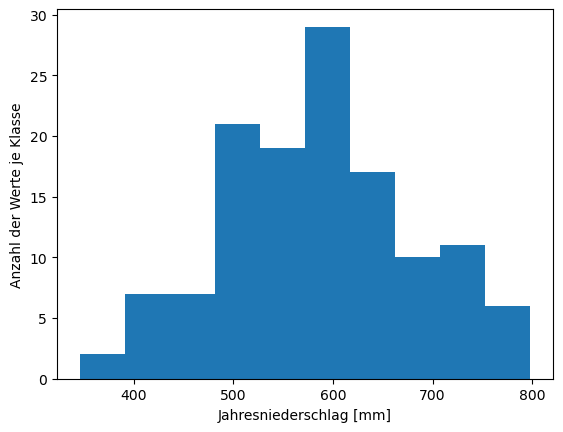

In [33]:
plt.hist(data_year)
plt.ylabel("Anzahl der Werte je Klasse")
plt.xlabel("Jahresniederschlag [mm]")
plt.show()

Um eine Normalverteilungsfunktion an die Daten zu fitten müssen wir zunächst den Mittelwert und die Standardabweichung berechnen.
Dazu definieren wir diese als Funktionen. Sie sind auch im numpy Paket als np.mean und np.std definiert. 

In [28]:
def mean(x):
    ''' 
    Funktion zur Berechnung des Mittelwertes
    '''
    return np.sum(x)/len(x)

def sd(x):
    ''' 
    Funktion zur Berechnung der Standardabweichung
    '''
    return np.sqrt(np.sum((x - mean(x))**2)/(len(x)))

In [36]:

mu = mean(data_year.values)
sigma = sd(data_year.values)

print("der Mittelwert beträgt:", mu)
print("die Standardabweichung beträgt:", sigma)


der Mittelwert beträgt: 585.3449612403101
die Standardabweichung beträgt: 96.10862714160997


96.10862714160997

Die Dichtefunktion der Normalverteilung wird wie folgt definiert:

In [43]:
def normal_verteilung(t,sigma=sigma,mu=mu):
    f = (1 / (sigma * np.sqrt(2*np.pi))) * np.exp(-1/2* ((t - mu)/sigma)**2)
    return f

Zur Darstellung der Normalverteilung wählen wir den Wertebereich um den Mittelwert mit +/-4 Standabweichungen.



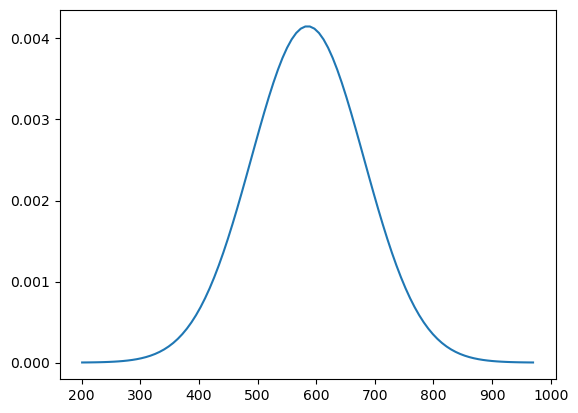

In [44]:

x = np.linspace(mu - 4*sigma, mu + 4*sigma,100) # Wertebereich um den Mittelwert (Min/Max je 3 Standabweichungen entfernt)
y = normal_verteilung(x)
plt.plot(x,y)
plt.show()

Als letzten Schritt plotten wir nun gemeinsam die gefittete Normalverteilungsfunktion und das Histogram mit den eigentlichen Daten:

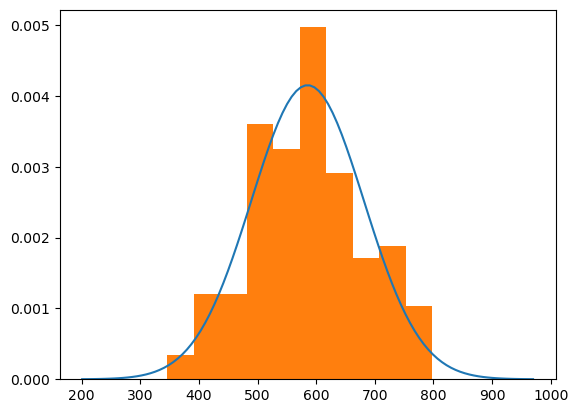

In [45]:

plt.plot(x,y)
plt.hist(data_year, density=True)
plt.show()